/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:00:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[40  3]
 [ 2 69]]


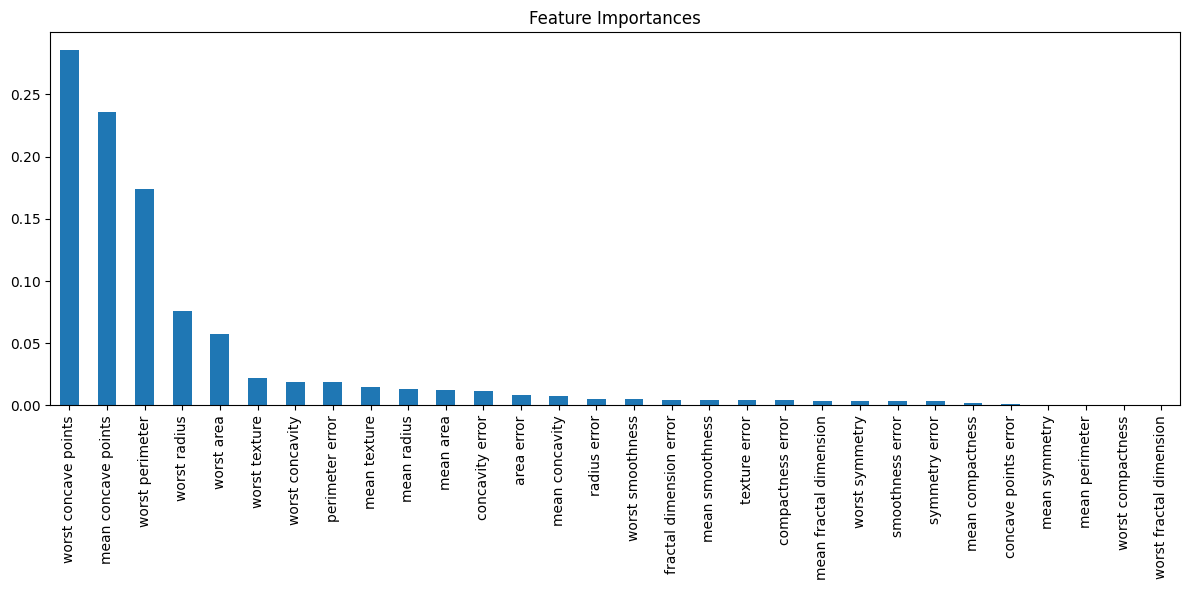

In [ ]:


import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 0 = malignant, 1 = benign (from sklearn docs)
target_names = data.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Results
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')
plt.tight_layout()
plt.show()
import pickle
with open("xgboost_cancer_model.sav", "wb") as f:
    pickle.dump(model, f)
